<a href="https://colab.research.google.com/github/renaud-florquin/hands_on_AI/blob/master/Intro2_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First NMIST classifier using fully connected NN and PyTorch

In [0]:
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F


In [2]:
print(torch.cuda.is_available())

True


### hyperparameters

In [0]:
input_size = 784
output_size = 10

epochs = 100
batch_size = 50
learning_rate = 0.0005

### Train and test data loader

In [0]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('tmp/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('tmp/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size, shuffle=True)

Access to the train loader to see the data and format

In [0]:
x, y = train_loader.__iter__().__next__()

In [6]:
x.shape, y.shape

(torch.Size([50, 1, 28, 28]), torch.Size([50]))

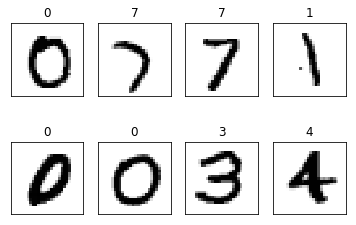

In [7]:
amount = 20
img_rows = 2
img_columns = 4
amount = img_rows * img_columns
fig = plt.figure()

for i in range(amount):
    ax = fig.add_subplot(img_rows, img_columns, 1 + i)
    plt.imshow(x[i][0], cmap='binary')
    plt.title(y[i].item())
    plt.xticks([]) 
    plt.yticks([])

plt.show()

### Neural network definition

In [0]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, output_size)
        
    def forward(self, x):
        z = x.view(-1, 1*28*28)
        z = self.layer1(z)
        z = F.relu(z)
        z = self.layer2(z)
        z = F.relu(z)
        z = self.layer3(z)
        return F.log_softmax(z)

In [9]:
net = Network()
print(net)

Network(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
)


### Optimizer and Loss function definition

In [0]:
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

### Train function

In [0]:
train_losses = []
test_losses = []
test_accuracies = []

def train_network(epoch):
    net.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        output = net(x)
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    return loss


In [0]:
def print_info(epoch, loss):
    print('Train Epoch: {} \tLoss: {:.6f}'.format(
      epoch, loss.item()))
    train_losses.append(loss.item())

def save_model_state():
    torch.save(net.state_dict(), 'model.pth')
    torch.save(optimizer.state_dict(), 'optimizer.pth')

### Evaluation function

In [0]:
def test_network():
    net.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for x, y in test_loader:
            output = net(x)
            test_loss += F.nll_loss(output, y, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(y.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracies.append(100. * correct / len(test_loader.dataset))
    print('Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
      test_loss, correct, len(test_loader.dataset),
      100. * correct / len(test_loader.dataset)))


### Train phase

In [14]:
for e in range(epochs):
        loss = train_network(e+1)
        test_network()
        #print_info(e+1, loss)
        save_model_state()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Avg. loss: 0.4124, Accuracy: 8898/10000 (88%)
Test set: Avg. loss: 0.3139, Accuracy: 9120/10000 (91%)
Test set: Avg. loss: 0.2765, Accuracy: 9211/10000 (92%)
Test set: Avg. loss: 0.2489, Accuracy: 9277/10000 (92%)
Test set: Avg. loss: 0.2263, Accuracy: 9343/10000 (93%)
Test set: Avg. loss: 0.2081, Accuracy: 9408/10000 (94%)
Test set: Avg. loss: 0.1911, Accuracy: 9436/10000 (94%)
Test set: Avg. loss: 0.1810, Accuracy: 9456/10000 (94%)
Test set: Avg. loss: 0.1667, Accuracy: 9505/10000 (95%)
Test set: Avg. loss: 0.1559, Accuracy: 9546/10000 (95%)
Test set: Avg. loss: 0.1483, Accuracy: 9562/10000 (95%)
Test set: Avg. loss: 0.1402, Accuracy: 9593/10000 (95%)
Test set: Avg. loss: 0.1332, Accuracy: 9615/10000 (96%)
Test set: Avg. loss: 0.1280, Accuracy: 9628/10000 (96%)
Test set: Avg. loss: 0.1226, Accuracy: 9637/10000 (96%)
Test set: Avg. loss: 0.1184, Accuracy: 9657/10000 (96%)
Test set: Avg. loss: 0.1147, Accuracy: 9660/10000 (96%)
Test set: Avg. loss: 0.1112, Accuracy: 9670/1000

### Display the evolution of the test accuracy

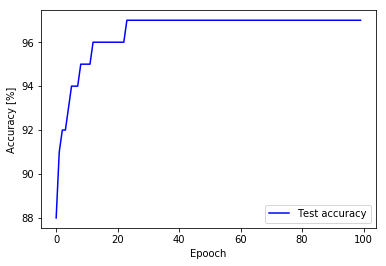

In [15]:
plt.plot(range(epochs), test_accuracies, color='blue')
plt.legend(['Test accuracy'], loc='lower right')
plt.xlabel('Epooch')
plt.ylabel('Accuracy [%]')

plt.show()